In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import nltk
nltk.download("stopwords")
nltk.download("punkt")    
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to C:\Users\AL -
[nltk_data]     ELMIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\AL -
[nltk_data]     ELMIA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AL -
[nltk_data]     ELMIA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Read Dataset**



In [6]:
df = pd.read_csv("C:/Users/AL - ELMIA/Desktop/mental health/Combined Data.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [9]:
df

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety
...,...,...,...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety


In [60]:
df.shape

(51093, 3)

### **check duplicate & null**


In [10]:
df.isna().sum()

Unnamed: 0      0
statement     362
status          0
dtype: int64

In [11]:
df.dropna(inplace = True)
df.isna().sum()

Unnamed: 0    0
statement     0
status        0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  52681 non-null  int64 
 1   statement   52681 non-null  object
 2   status      52681 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [42]:
df.drop_duplicates(inplace=True)
total_duplicates = df.duplicated().sum()
total_duplicates


np.int64(0)

In [81]:
print("hello")

hello


In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df)

                                               statement   status
0                                             oh my gosh  Anxiety
1      trouble sleeping, confused mind, restless hear...  Anxiety
2      All wrong, back off dear, forward doubt. Stay ...  Anxiety
3      I've shifted my focus to something else but I'...  Anxiety
4      I'm restless and restless, it's been a month n...  Anxiety
...                                                  ...      ...
53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040  Is there any way to sleep better? I can't slee...  Anxiety
53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042  I have really bad door anxiety! It's not about...  Anxiety

[52681 rows x 2 columns]


### **visualization**

In [40]:
df['status'].nunique()

7

In [38]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [18]:
sentiment_counts=df['status'].value_counts()
print(sentiment_counts)

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [20]:
df.describe()

,statement,status
count,52681,52681
unique,51073,7
top,what do you mean?,Normal
freq,22,16343


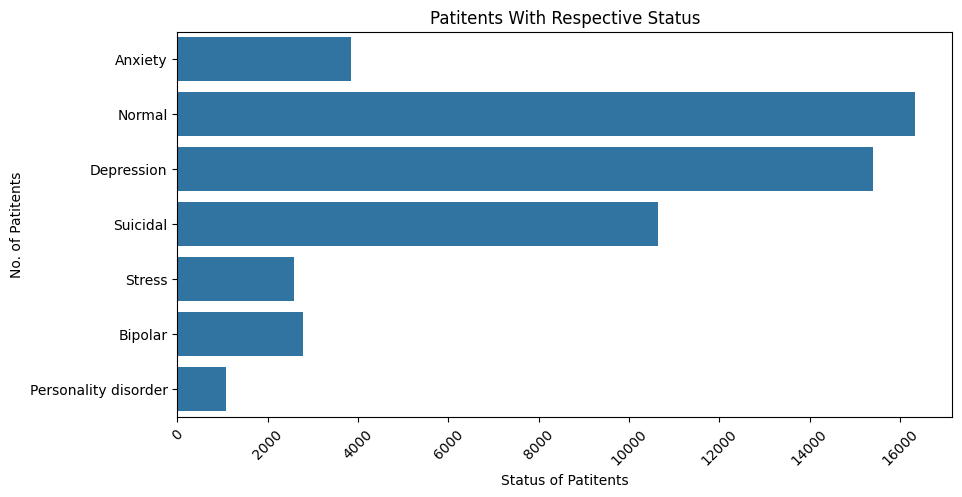

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df['status'])
plt.xlabel("Status of Patitents")
plt.ylabel("No. of Patitents")
plt.title("Patitents With Respective Status")
plt.xticks(rotation=45)
plt.show()

### **check outliers**

count    52681.000000
mean       578.713863
std        846.269078
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: statement_length, dtype: float64


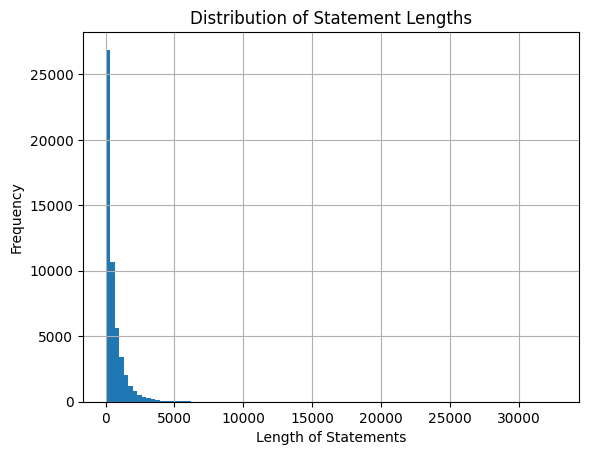

In [33]:
df['statement_length'] = df['statement'].apply(len)

# Display basic statistics of statement lengths
print(df['statement_length'].describe())

# Plot the distribution of statement lengths
df['statement_length'].hist(bins=100)
plt.title('Distribution of Statement Lengths')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

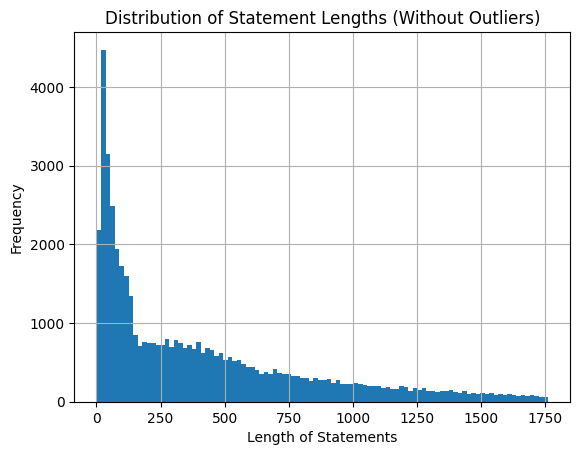

In [32]:
left , right =500,500
Q1 = df['statement_length'].quantile(0.25)
Q3 = df['statement_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['statement_length'] >= lower_bound) & (df['statement_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['statement_length'].hist(bins=100)
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')

plt.show()

In [ ]:
###sample_size = 20000
###df_sample = df.sample(n=sample_size, random_state=1)

In [47]:
!pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached preshed-3.0.9-cp310-cp310-win_amd64.whl.metadata (2.2 kB)
  Using cached srsly-2.4.8-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
     ---------------------------------------- 0.0/170.8 kB ? eta -:--:--
     --------- ----------------------------- 41.0/170.8 kB 2.0 MB/s eta 0:00:01
     --------------------------- ---------- 122.9/170.8 kB 1.4 MB/s eta 0:00:01
     ---------------------------------- --- 153.6/170.8 kB 1.8 MB/s eta 0:00:01
     ---------------------------------- --- 153.6/170.8 kB 1.8 MB/s eta 0:00:01
     ---------------------------------- - 163.8/170.8 kB 756.6 kB/s eta 0:00:01
     ---------------------------------- - 163.8/170.8 kB 756.6 kB/s eta 0:00:01
     ---------------------------------- - 163.8/170.8 kB 756.6 kB/s eta 0:00:01
     ----------


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\AL - ELMIA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 495.5 kB/s eta 0:00:26
     ---------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
     ---------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
      -------------------------------------- 0.2/12.8 MB 981.9 kB/s eta 0:00:13
      -------------------------------------- 0.3/12.8 MB 947.5 kB/s eta 0:00:14
      -------------------------------------- 0.3/12.8 MB 886.2 kB/s eta 0:00:15
     - ------------------------------------- 0.3/12.8 MB 912.8 kB/s eta 0:00:14
     - ------------------------------------- 0.4/12.8 MB 882.8 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 859.0 kB/s eta 0:00:15
     - ------------------------------------- 0.4/12.8 MB 860.2 kB/s eta 0:00:15
     - ------------------------------------- 0.5/1


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: C:\Users\AL - ELMIA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### **preprocessing**

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")



In [ ]:
lemmatizer = WordNetLemmatizer()
##stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
     # Remove punctuation,space 
    text = re.sub(r'[^a-zA-Z\s]|\s+[a-zA-Z]\s+|\s+', ' ', text)

    # Process text with spacy
    doc = nlp(text)

    # Lemmatize and remove stop words
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    # Join the tokens back into a single string
    return ' '.join(tokens)

In [58]:
df['statement']=df['statement'].apply(preprocess_text)

### **train &test**

In [59]:
x=df['statement']
y=df['status']

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [62]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(40874,) (40874,) (10219,) (10219,)


### **tf_idf**

In [64]:
vec=TfidfVectorizer()
x_train_tfidf=vec.fit_transform(x_train)
x_test_tfidf=vec.transform(x_test)
print(x_train_tfidf.shape,x_test_tfidf.shape)

(40874, 59895) (10219, 59895)


In [65]:
print(x_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1345708 stored elements and shape (40874, 59895)>
  Coords	Values
  (0, 58573)	0.14754224555381007
  (0, 58796)	0.06145301440406928
  (0, 15671)	0.16657714549433286
  (0, 20022)	0.39922713830125955
  (0, 1119)	0.09892928892603778
  (0, 59133)	0.040900534337667695
  (0, 38021)	0.05810952480253101
  (0, 32693)	0.08714728124963103
  (0, 39708)	0.11527843327330033
  (0, 34996)	0.10082593651414756
  (0, 56272)	0.1633027828848314
  (0, 3831)	0.09403282023496544
  (0, 8171)	0.0653478709184002
  (0, 2564)	0.16657714549433286
  (0, 54623)	0.1293382916484474
  (0, 35640)	0.09409839951502316
  (0, 57497)	0.14183842875448793
  (0, 50321)	0.06650775229131574
  (0, 9057)	0.0888652268855632
  (0, 8029)	0.07865047980166348
  (0, 58396)	0.043797646114240175
  (0, 35393)	0.14982642913070968
  (0, 17421)	0.14364423811453267
  (0, 51928)	0.0780653289782819
  (0, 51742)	0.09167556104301379
  :	:
  (40873, 57035)	0.03298996182819302
  (40873, 362

In [66]:
print(x_test_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 323129 stored elements and shape (10219, 59895)>
  Coords	Values
  (0, 164)	0.5505805892332811
  (0, 34077)	0.5280732070883615
  (0, 59715)	0.6465289651012903
  (1, 7797)	0.15180630412611548
  (1, 9051)	0.762869094584217
  (1, 9866)	0.1991190444203663
  (1, 10993)	0.146590845331734
  (1, 13417)	0.18604953851855235
  (1, 19768)	0.07281776089171539
  (1, 20520)	0.2875768885955482
  (1, 24229)	0.15738367698146588
  (1, 31374)	0.14615171148586126
  (1, 34454)	0.1699879782498805
  (1, 43751)	0.22367097862336902
  (1, 52928)	0.21457560124103656
  (1, 56742)	0.20033408148666523
  (2, 634)	0.1871520837883066
  (2, 2538)	0.13204064905385365
  (2, 5154)	0.13842834402210677
  (2, 5942)	0.22402295704961028
  (2, 6485)	0.058355518567397104
  (2, 7049)	0.08971551178887056
  (2, 8171)	0.08933028721693778
  (2, 8388)	0.2161538303944963
  (2, 8464)	0.20613436449280612
  :	:
  (10218, 19336)	0.1473008604552868
  (10218, 22526)	0.2926755096514

### **model(randomforest)** 

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()   
rf.fit(x_train_tfidf,y_train)   #train

RandomForestClassifier()

In [ ]:
ypred=rf.predict(x_test_tfidf)   #test 
ytr_pred=rf.predict(x_train_tfidf)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
#   (Accuracy train ) 
train_accuracy = accuracy_score(y_train, ytr_pred)
train_precision = precision_score(y_train, ytr_pred, average='weighted')
train_recall = recall_score(y_train, ytr_pred, average='weighted')

# (Accuracy test)
test_accuracy = accuracy_score(y_test, ypred)
test_precision = precision_score(y_test, ypred, average='weighted')
test_recall = recall_score(y_test, ypred, average='weighted')


print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Training Precision: {train_precision:.2f}")
print(f"Training Recall: {train_recall:.2f}\n")

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}\n")

#   Overfitting  Underfitting
if train_accuracy > 0.9 and test_accuracy < 0.7:
    print("The model may be overfitting. It's performing well on the training set but poorly on the test set.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("The model may be underfitting. It's not performing well on both the training and test sets.")
else:
    print("The model seems to have a good balance between training and test performance.")

Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00

Test Accuracy: 0.68
Test Precision: 0.72
Test Recall: 0.68

The model may be overfitting. It's performing well on the training set but poorly on the test set.
